<a href="https://colab.research.google.com/github/KPI68/project2-team5/blob/main/neuralnet_algo_trade_copyKPI68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Neural Network

Neural Network was leveraged as one of the predictive model options for this project, given that:
>
> * The algorithm can recognize hidden patterns and correlations in raw data and cluster, and over time continuously learn and improve
>
> * it provides options and parameters that are adjustable, these parameters can be changed continuously throughout the learning process to improve the overall output result of the model



## Data Preparation and Model Training Process

The following steps were applied to prepare the data and train the model:

1. By Leveraging Alpaca, we extracted trading data for 6 months period, steps taken are as follows:
>
> * Set Alpaca API key and secret key.
>
> * Verify that Alpaca key and secret key were correctly loaded.
>
> * Create the Alpaca API object.
>
> * Reterived the tarding data for the specific ticker for the period required

2. Compile and evaluate a binary classification model using a neural network.

3. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “signal”. The remaining columns should define the features dataset.

4. Split the features and target sets into training and testing datasets.

5. Use scikit-learn's `StandardScaler` to scale the features data.

### Model Evaluation and Training Process Using a Neural Network

The following steps were completed as part of the evaluation and Training process:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

3. Utilized small number of epochs when fitting the model

3. Evaluate the model using the test data to determine the model’s loss and accuracy.



In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/git_repo/project2-team5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/git_repo/project2-team5


In [ ]:
!pip3 install python-dotenv
!pip3 install alpaca_trade_api
!pip3 install holoviews
!pip3 install hvplot

In [1]:
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [4]:
load_dotenv()

True

## Data Retrieval from Alpaca

In [5]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [6]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [7]:
# Create the Alpaca API object
project2_alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
tickers = ["AAPL"]
timeframe = "1Day"
start = pd.Timestamp("2023-01-05", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-08-24", tz="America/New_York").isoformat()

In [50]:
# Get the trading data for AAPL for 6 months period
p2_portfolio_df = project2_alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
p2_portfolio_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-05 05:00:00+00:00,127.130,127.7400,124.760,125.02,81246605,663745,126.088261,AAPL
2023-01-06 05:00:00+00:00,126.010,130.2900,124.890,129.62,87758343,711520,128.198067,AAPL
2023-01-09 05:00:00+00:00,130.465,133.4100,129.890,130.15,70832518,647372,131.628178,AAPL
2023-01-10 05:00:00+00:00,130.260,131.2636,128.120,130.73,63924884,555791,129.822614,AAPL
2023-01-11 05:00:00+00:00,131.250,133.5100,130.460,133.49,69546367,562444,132.308564,AAPL
...,...,...,...,...,...,...,...,...
2023-08-18 04:00:00+00:00,172.300,175.1000,171.960,174.49,60770859,589800,173.888267,AAPL
2023-08-21 04:00:00+00:00,175.070,176.1300,173.735,175.84,46497547,560921,175.223265,AAPL
2023-08-22 04:00:00+00:00,177.060,177.6800,176.250,177.23,42127659,502362,177.010067,AAPL


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Curve   [timestamp]   (close)
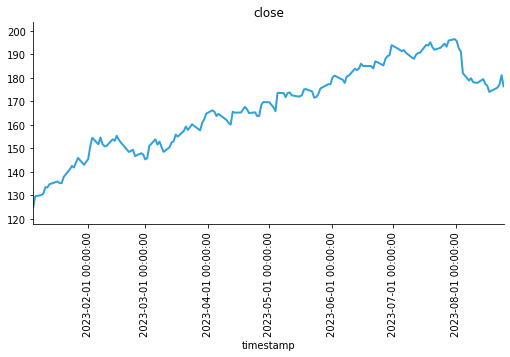

In [51]:
hv.extension('bohek')
p2_portfolio_df['close'].hvplot(rot=90)


## Calculate Returns



In [52]:
# Calculate the daily returns using the closing prices and the pct_change function
p2_portfolio_df['daily_returns'] = p2_portfolio_df['close'].pct_change()

# Calculate the daily returns lagged using the daily returns
p2_portfolio_df['daily_returns_lagged'] = p2_portfolio_df['daily_returns'].shift(1)

# Drop all NaN values from the DataFrame
p2_portfolio_df = p2_portfolio_df.dropna()

# Display sample data
p2_portfolio_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol,daily_returns,daily_returns_lagged
timestamp,,,,,,,,,,
2023-01-09 05:00:00+00:00,130.465,133.4100,129.89,130.15,70832518,647372,131.628178,AAPL,0.004089,0.036794
2023-01-10 05:00:00+00:00,130.260,131.2636,128.12,130.73,63924884,555791,129.822614,AAPL,0.004456,0.004089
2023-01-11 05:00:00+00:00,131.250,133.5100,130.46,133.49,69546367,562444,132.308564,AAPL,0.021112,0.004456
2023-01-12 05:00:00+00:00,133.880,134.2600,131.44,133.41,71379796,635331,133.171001,AAPL,-0.000599,0.021112
2023-01-13 05:00:00+00:00,132.030,134.9200,131.66,134.76,57769049,536939,133.677962,AAPL,0.010119,-0.000599


In [33]:
p2_portfolio_df[['daily_returns','daily_returns_lagged']].corr().style.background_gradient()

,daily_returns,daily_returns_lagged
daily_returns,1.000000,0.042856
daily_returns_lagged,0.042856,1.000000


## Define a Simple Momentum Strategy

In [53]:
# Initialize the new Signal column
p2_portfolio_df['signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
p2_portfolio_df.loc[(p2_portfolio_df['daily_returns'] >= 0), 'signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
p2_portfolio_df.loc[(p2_portfolio_df['daily_returns'] < 0), 'signal'] = -1

# Drop JPM
p2_portfolio_df = p2_portfolio_df.drop(['symbol'],axis=1)

# Review the DataFrame
display(p2_portfolio_df.head())

<ipython-input-53-81046785c4c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_portfolio_df['signal'] = 0.0


,open,high,low,close,volume,trade_count,vwap,daily_returns,daily_returns_lagged,signal
timestamp,,,,,,,,,,
2023-01-09 05:00:00+00:00,130.465,133.4100,129.89,130.15,70832518,647372,131.628178,0.004089,0.036794,1.0
2023-01-10 05:00:00+00:00,130.260,131.2636,128.12,130.73,63924884,555791,129.822614,0.004456,0.004089,1.0
2023-01-11 05:00:00+00:00,131.250,133.5100,130.46,133.49,69546367,562444,132.308564,0.021112,0.004456,1.0
2023-01-12 05:00:00+00:00,133.880,134.2600,131.44,133.41,71379796,635331,133.171001,-0.000599,0.021112,-1.0
2023-01-13 05:00:00+00:00,132.030,134.9200,131.66,134.76,57769049,536939,133.677962,0.010119,-0.000599,1.0


In [ ]:
#p2_portfolio_df = p2_portfolio_df.reset_index(drop=True)
#p2_portfolio_df

## Create the features (`X`) and target (`y`) datasets

In [54]:
# Define the target set y using the signal column
y = p2_portfolio_df['signal']

# Define features set X by selecting all columns but IS_SUCCESSFUL
#X = p2_portfolio_df.drop(columns=["signal"])
X = p2_portfolio_df.drop(columns=["signal"])
# Review the features DataFrame
X.head()

# Display a sample of y and X features
display(y.head())
display(X.head())

timestamp
2023-01-09 05:00:00+00:00    1.0
2023-01-10 05:00:00+00:00    1.0
2023-01-11 05:00:00+00:00    1.0
2023-01-12 05:00:00+00:00   -1.0
2023-01-13 05:00:00+00:00    1.0
Name: signal, dtype: float64

,open,high,low,close,volume,trade_count,vwap,daily_returns,daily_returns_lagged
timestamp,,,,,,,,,
2023-01-09 05:00:00+00:00,130.465,133.4100,129.89,130.15,70832518,647372,131.628178,0.004089,0.036794
2023-01-10 05:00:00+00:00,130.260,131.2636,128.12,130.73,63924884,555791,129.822614,0.004456,0.004089
2023-01-11 05:00:00+00:00,131.250,133.5100,130.46,133.49,69546367,562444,132.308564,0.021112,0.004456
2023-01-12 05:00:00+00:00,133.880,134.2600,131.44,133.41,71379796,635331,133.171001,-0.000599,0.021112
2023-01-13 05:00:00+00:00,132.030,134.9200,131.66,134.76,57769049,536939,133.677962,0.010119,-0.000599


## Split the features and target sets into training and testing datasets.

In [55]:
# Split the data into a training and testing dataset and Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_test = X.iloc[-15:,:]
# y_test = y[-15:]
# X_train = X.iloc[:-15,:]
# y_train = y[:-15]

## Use scikit-learn's `StandardScaler` to scale the features data.

In [56]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
len(X_train_scaled[0])

9

## Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

In [58]:
# Define the the number of inputs to the model
#number_inputs = 9

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 10

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 5

# Create the Sequential model instance
nn = Sequential()

# Add the first Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
#nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_inputs, activation="relu"))
nn.add(Dense(units=hidden_nodes_layer1, input_dim=len(X_train_scaled[0]), activation="relu"))

# Add the second Dense layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(1, activation="sigmoid"))

In [59]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                100       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


## Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

In [60]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [61]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.4730 - accuracy: 0.2797
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.2797
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.2797
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.2797
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.2797
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.2797
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.2712
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.2712
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.2712
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.2712
Epoch 11/100
4/4 [===========

## Evaluate the model using the test data to determine the model’s loss and accuracy.

In [62]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: -3.7814e+00 - accuracy: 0.2000 - 148ms/epoch - 74ms/step
Loss: -3.78137469291687, Accuracy: 0.20000000298023224


2/2 [==============================] - 0s 10ms/step


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
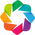

:Curve   [index]   (0)

In [63]:
# Save predictions on the test data
predictions = nn.predict(X_test_scaled)
hv.extension('bokeh')
pd.DataFrame(predictions).hvplot()

In [64]:
# Get the most likely prediction for each observation
most_likely = np.argmax(predictions, axis=1)
most_likely

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
X_test

,open,high,low,close,volume,trade_count,vwap,daily_returns,daily_returns_lagged
timestamp,,,,,,,,,
2023-02-21 05:00:00+00:00,150.2000,151.3000,148.4050,148.48,58914102,510373,149.354555,-0.026680,-0.007547
2023-06-13 04:00:00+00:00,182.8000,184.1500,182.4400,183.31,55151663,609651,183.170628,-0.002883,0.015915
2023-01-30 05:00:00+00:00,144.9550,145.5500,142.8500,143.00,64035195,551982,143.652231,-0.020078,0.013684
2023-05-05 04:00:00+00:00,170.9600,174.3000,170.7600,173.62,105751119,909418,173.293082,0.047228,-0.009913
2023-07-10 04:00:00+00:00,189.2600,189.9900,187.0350,188.61,59931763,736913,188.363044,-0.010856,-0.005891
2023-02-06 05:00:00+00:00,152.5750,153.1000,150.7800,151.73,69971158,584464,152.095141,-0.017929,0.024400
2023-04-25 04:00:00+00:00,165.1900,166.3050,163.7300,163.77,48849358,502773,164.647271,-0.009436,0.001879
2023-01-25 05:00:00+00:00,140.8900,142.4300,138.8100,141.86,65853903,537643,140.753668,-0.004701,0.010063
2023-03-08 05:00:00+00:00,152.8100,153.4700,151.8300,152.87,47238140,405959,152.697389,0.008377,-0.014497


In [73]:
# assume the prediction > mean is buy, < mean is sell, =mean is do nothing
instr_df = pd.DataFrame()
mean_pred = predictions.mean()
pred_at = 0
for index,row in X_test.iterrows():
    pred = predictions[pred_at]
    pred_at += 1
    if pred > mean_pred:
      signal = 1
    elif pred < mean_pred:
      signal = -1
    else:
      signal = 0

    instr_df = pd.concat([instr_df, pd.DataFrame([[index.date(), 'AAPL', signal]])])
instr_df.sort_values(0, inplace=True)

 ### Show result

In [67]:
from trade import trade_action

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
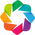

On 2023-01-17 trade AAPL
{'action': 'buy', 'price': 135.55, 'bal': 104.85, 'share': 73, 'status': 0, 'msg': 'success'}
On 2023-01-25 trade AAPL
{'action': 'sell', 'price': 141.0, 'bal': 10397.85, 'share': 73, 'status': 0, 'msg': 'success'}
On 2023-01-30 trade AAPL
{'action': 'none', 'price': 144.09, 'bal': 10397.85, 'share': 0, 'status': -1, 'msg': 'no share to sell'}
On 2023-02-01 trade AAPL
{'action': 'buy', 'price': 144.33, 'bal': 439.08, 'share': 69, 'status': 0, 'msg': 'success'}
On 2023-02-06 trade AAPL
{'action': 'sell', 'price': 152.05, 'bal': 10930.53, 'share': 69, 'status': 0, 'msg': 'success'}
On 2023-02-21 trade AAPL
{'action': 'none', 'price': 149.6, 'bal': 10930.53, 'share': 0, 'status': -1, 'msg': 'no share to sell'}
On 2023-02-23 trade AAPL
{'action': 'none', 'price': 149.27, 'bal': 10930.53, 'share': 0, 'status': -1, 'msg': 'no share to sell'}
On 2023-02-27 trade AAPL
{'action': 'buy', 'price': 148.06, 'bal': 1010.51, 'share': 67, 'status': 0, 'msg': 'success'}
On 2023

/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Curve.I     :Curve   [date]   (AAPL)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [date]   (value)

In [74]:
hv.extension('bokeh')
trade_action(instr_df)